# EDA
Data_set : events.csv

In [1]:
!pip install pandas matplotlib seaborn

In [1]:
# import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

sns.set_theme(style="darkgrid")
# 폰트 설정
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 데이터셋 로드
df = pd.read_csv('events.csv')
df.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ
5,2020-09-24 11:57:59 UTC,view,664325,2144415951611757447,construction.tools.saw,carver,52.33,1515915625519388062,vnkdP81DDW
6,2020-09-24 11:58:23 UTC,view,3791349,2144415935086199225,computers.desktop,NaN,215.41,1515915625519388877,J1t6sIYXiV
7,2020-09-24 11:58:24 UTC,view,716611,2144415923694469257,computers.network.router,d-link,53.14,1515915625519388882,kVBeYDPcBw
8,2020-09-24 11:58:25 UTC,view,657859,2144415939431498289,NaN,NaN,34.17,1515915625519320570,HEl15U7JVy
9,2020-09-24 11:58:31 UTC,view,716611,2144415923694469257,computers.network.router,d-link,53.14,1515915625519388929,F3VB9LYp39


총 885,129의 행과 9새의 column으로 구성
- event_time - object, 날짜 데이터
- event_type - object, 이벤트 유형
    - view - 제품 조회
    - cart - 장바구니 추가 
    - remove_from_cart - 장바구니 제거
    - purchase - 제품을 구매
- product_id - int, 제품 ID
- category_id - int, 제품 카테고리 ID
- category_code - int, 제품 카테고리 ID (결측치 다수)
- brand - object, 브랜드 이름을 소문자로 표기 (결측치 다수)
- price - float, rkrur
- user_id - int, 영구 사용자 ID
- user_session - object, 임시 사용자 세션 ID 

In [3]:
# 기본 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


In [4]:
# 기본 통계 요약
df.describe(include='all')
# df['price'].max()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
count,885129,885129,8.851290e+05,8.851290e+05,648910,672765,885129.000000,8.851290e+05,884964
unique,845041,3,NaN,NaN,107,999,NaN,NaN,490398
top,2021-02-04 21:48:32 UTC,view,NaN,NaN,computers.components.videocards,asus,NaN,NaN,nFlhu5QzOd
freq,18,793748,NaN,NaN,116717,27706,NaN,NaN,572
mean,NaN,NaN,1.906621e+06,2.144423e+18,NaN,NaN,146.328713,1.515916e+18,NaN
std,NaN,NaN,1.458708e+06,6.165105e+14,NaN,NaN,296.807683,3.747287e+07,NaN
min,NaN,NaN,1.020000e+02,2.144416e+18,NaN,NaN,0.220000,1.515916e+18,NaN
25%,NaN,NaN,6.988030e+05,2.144416e+18,NaN,NaN,26.460000,1.515916e+18,NaN
50%,NaN,NaN,1.452883e+06,2.144416e+18,NaN,NaN,65.710000,1.515916e+18,NaN
75%,NaN,NaN,3.721194e+06,2.144416e+18,NaN,NaN,190.490000,1.515916e+18,NaN


In [5]:
# 데이터프레임 확인
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


# 확인 사항
- 결측치 - category_code, brand, user_session열에 결측치 발생
- price 열의 평균값 146.33, 최소값 0.22, 최대값 64,771.06
- event_time 시간 정보, datetime 형태로 변환하여 시간 분석 사용 가능
- product_id, category_id, user_id는 각 행에 대한 고유 식별자로 사용됨

In [6]:
#결측치 처리
df['category_code'].fillna('unknown', inplace=True)
df['brand'].fillna('unknown', inplace=True)
df['user_session'].fillna('unknown', inplace=True)

df.info()

/var/folders/kw/s1p33ssd2q94nb1csdw73sdw0000gn/T/ipykernel_18007/520052232.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['category_code'].fillna('unknown', inplace=True)
/var/folders/kw/s1p33ssd2q94nb1csdw73sdw0000gn/T/ipykernel_18007/520052232.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  885129 non-null  object 
 5   brand          885129 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   885129 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


In [7]:
df['event_time'] = pd.to_datetime(df['event_time'], format='%Y-%m-%d %H:%M:%S UTC')

In [8]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06,view,1996170,2144415922528452715,electronics.telephone,unknown,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27,view,215454,2144415927158964449,unknown,unknown,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36,view,3658723,2144415921169498184,unknown,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


히스토그램
- 

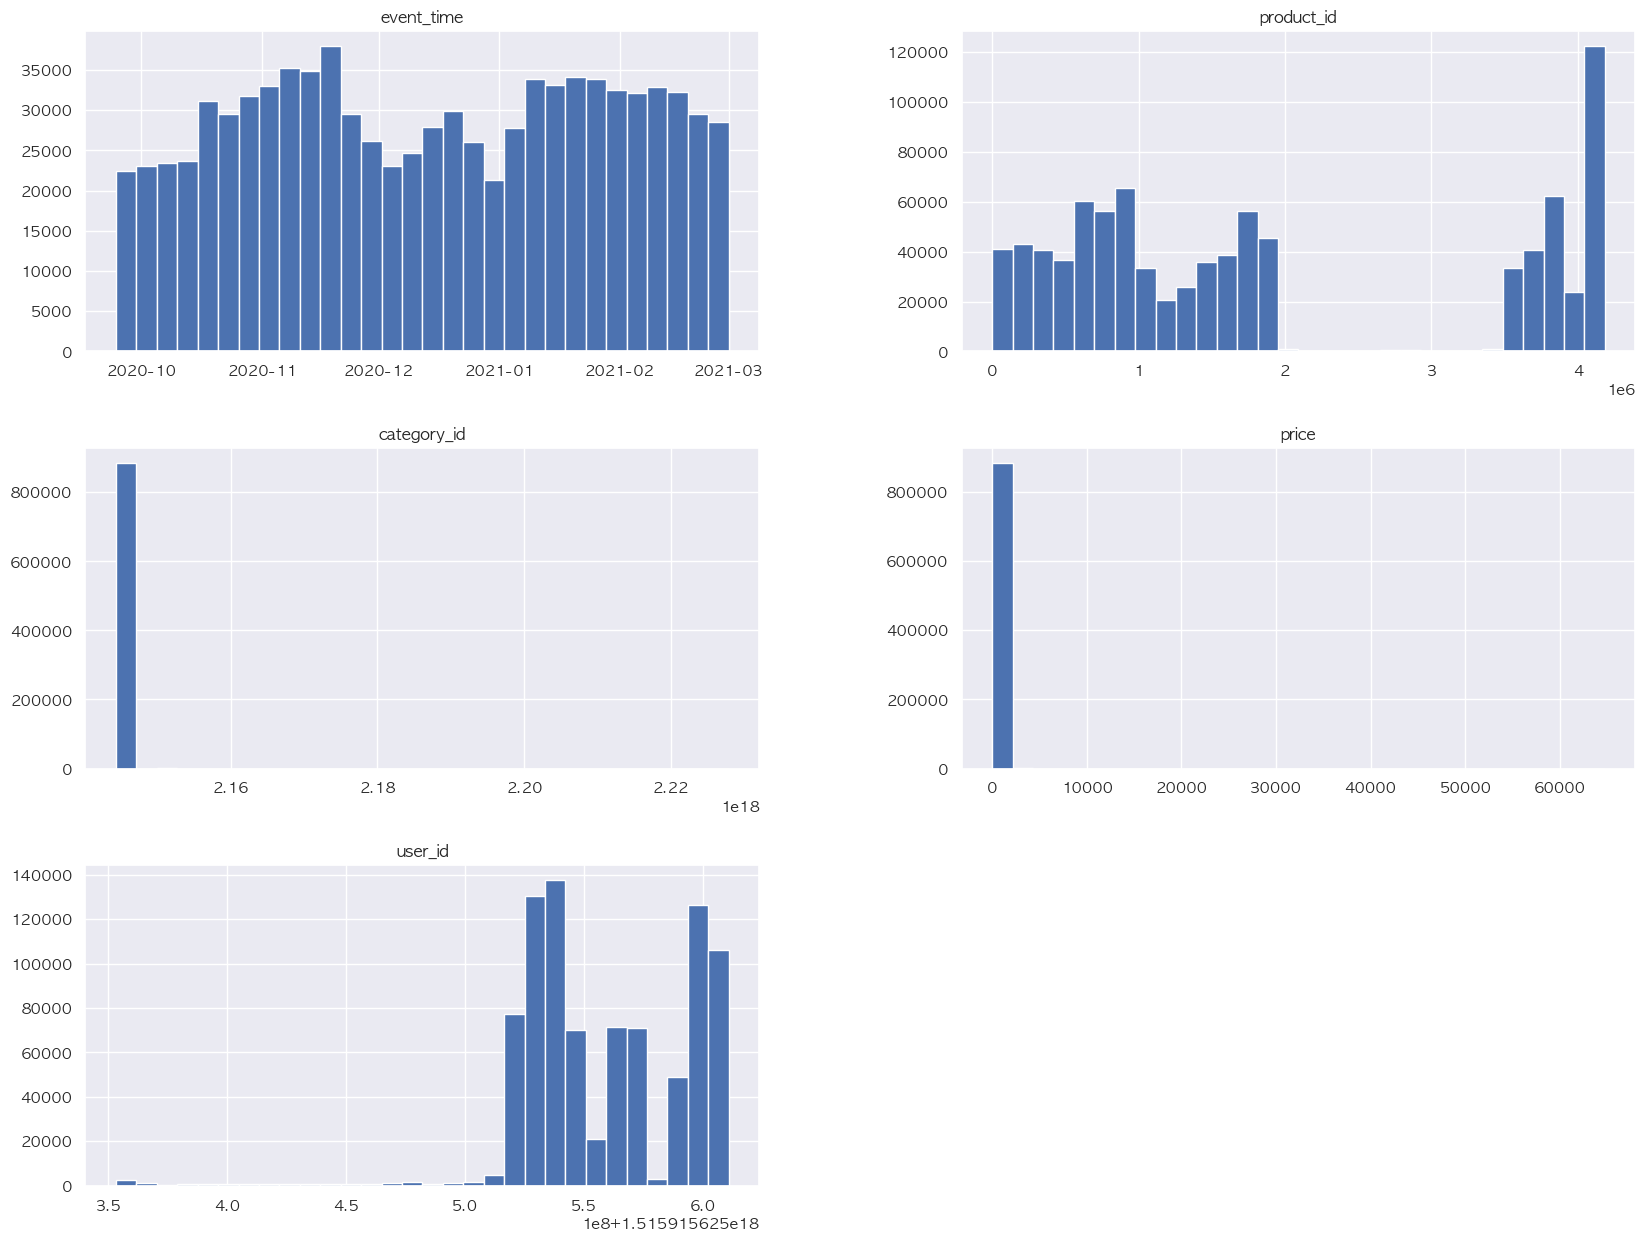

In [9]:
# 히스토그램
df.hist(bins=30, figsize=(20, 15))
plt.show()

Price 변수 이상치 찾기

In [10]:
# price 열의 중앙값과 평균값 비교
mean_p = df['price'].mean()
median_p = df['price'].median()
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# 평균값 중앙값 출력
print(f'Mean: {mean_p}')
print(f'Median: {median_p}')

# 범위와 IQR 계산
min_p = df['price'].min()
max_p = df['price'].max()
iqr = Q3- Q1

# 값의 범위와 IQR(사분 범위) 출력
print(f'Price range: {min_p} ~ {max_p}')
print(f'Interquartile Range (IQR) of Price: {iqr}')

Mean: 146.3287134982585
Median: 65.71
Price range: 0.22 ~ 64771.06
Interquartile Range (IQR) of Price: 164.03


In [11]:
# 정상 범위 구하기
lower_bound = Q1 - 1.5 * iqr
upper_bound = Q3 + 1.5 * iqr
print(f'Lower Bound of Price: {lower_bound}')
print(f'Upper Bound of Price: {upper_bound}')

Lower Bound of Price: -219.585
Upper Bound of Price: 436.535


In [12]:
# 이상치를 제거한 범위의 값
price_mask = (df['price']>=lower_bound) & (df['price']<=upper_bound)
price_mask_df = df[price_mask]
filtered_df = price_mask_df
# 이상치를 제거한 범위의 최대 최소값
min_price = price_mask_df['price'].min()
max_price = price_mask_df['price'].max()
# 결과 출력
print(f'Lower Bound of Price: {lower_bound}')
print(f'Upper Bound of Price: {upper_bound}')
print(f'Min Price: {min_price}')
print(f'Max Price: {max_price}')

Lower Bound of Price: -219.585
Upper Bound of Price: 436.535
Min Price: 0.22
Max Price: 436.49


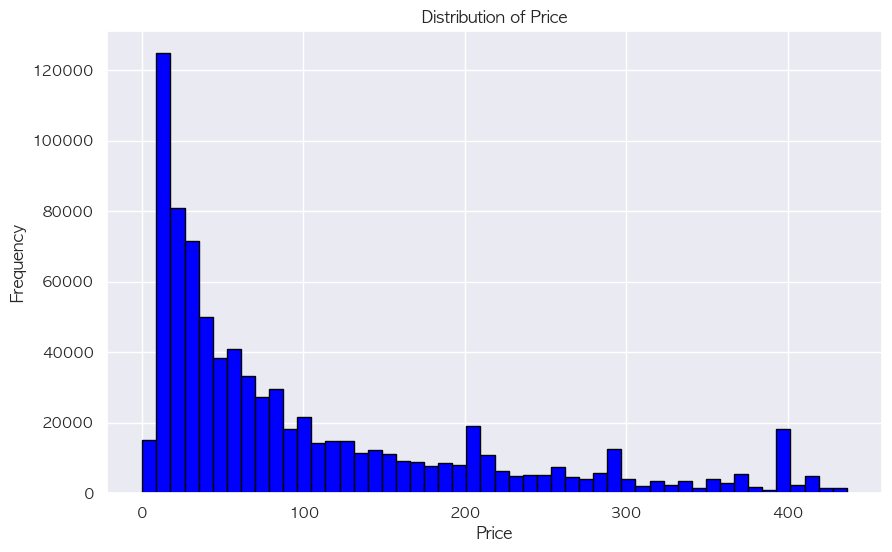

In [13]:
# price 변수의 히스토그램
plt.figure(figsize=(10, 6))
plt.hist(price_mask_df['price'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

가격 분포는 여전히 오른쪽 꼬리가 긴 분포를 보이며, 대부분의 제품 가격이 저렴한 범위에 집중되어 있다.

# 히트맵 분석

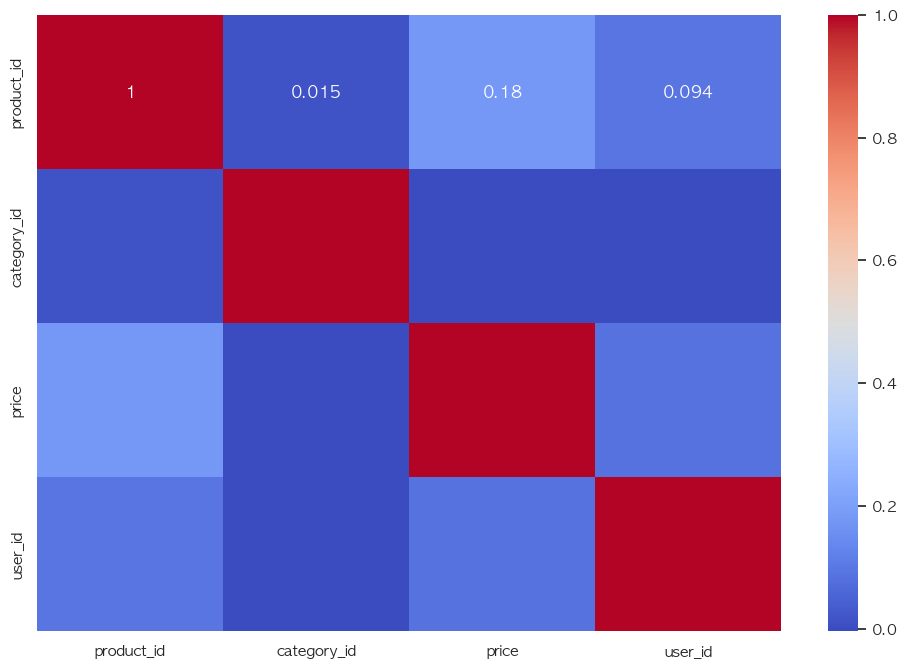

In [14]:
# 정수, 실수로 구성된 행만 추려서 상관계수 구하기
cols = df.select_dtypes(include=['float64', 'int64']).columns
matrix = df[cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.show()

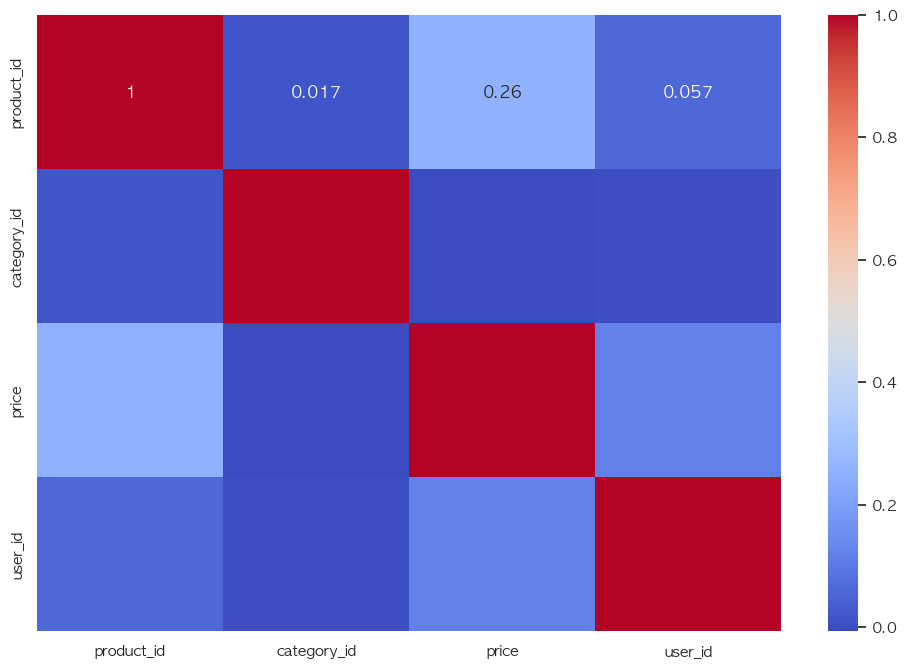

In [15]:
cols = filtered_df.select_dtypes(include=['float64', 'int64']).columns
matrix = filtered_df[cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.show()

이벤트 타입에 따른 가격 분포
===

In [16]:
# 폰트 설정
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

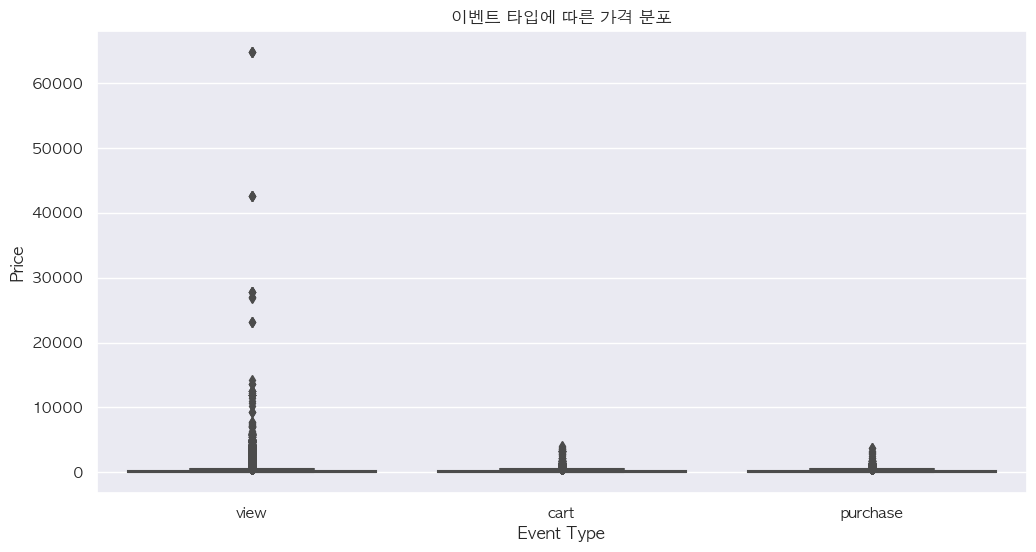

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='event_type', y='price', data=df)
plt.title('이벤트 타입에 따른 가격 분포')
plt.xlabel('Event Type')
plt.ylabel('Price')
plt.show()

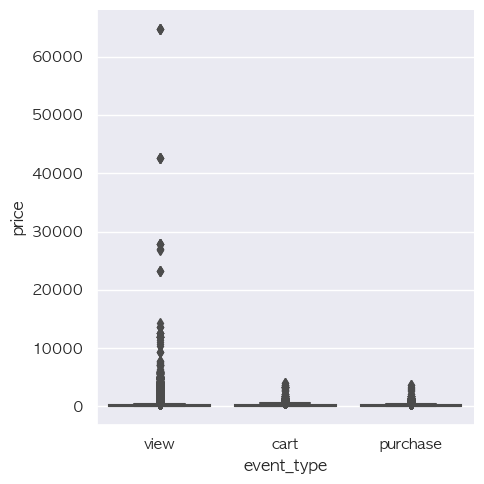

In [18]:
sns.catplot(data=df, x="event_type", y="price", kind="box")

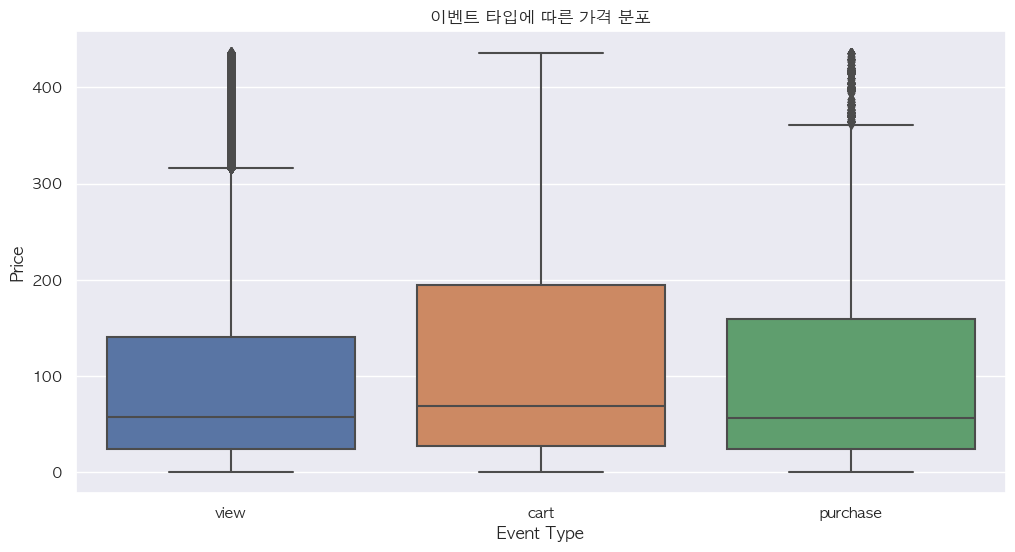

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='event_type', y='price', data=filtered_df)
plt.title('이벤트 타입에 따른 가격 분포')
plt.xlabel('Event Type')
plt.ylabel('Price')
plt.show()

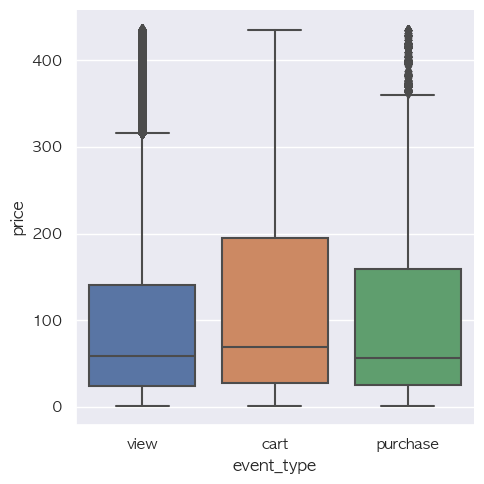

In [20]:
sns.catplot(data=filtered_df, x="event_type", y="price", kind="box")

- cart의 중앙값이 purchase보다 높음 최종 구매시 더 저렴한 제품을 선택하는 것 같다.
- view의 중앙값이 purchase보다 높다는 것은 다양한 제품을 보지만 실제로는 더 가격이 낮은 제품을 선택한다는 것을 의미하는 것 같다.

브랜드별 매출
===

In [21]:
# 브랜드별 총 매출
brand_df = filtered_df.groupby('brand')['price'].sum()

In [22]:
# index 부여
brand_df = brand_df.reset_index()

In [23]:
brand_df.sort_values('price', ascending=False, inplace=True)
brand_df.head(10)

,brand,price
901,unknown,15343564.33
314,gigabyte,4685393.84
584,msi,3707063.09
33,amd,3269740.66
58,asus,2938536.99
656,palit,2474274.60
756,samsung,2178659.77
760,sapphire,2137704.31
132,canon,2092329.82
694,powercolor,1463408.08


<Axes: xlabel='price', ylabel='brand'>

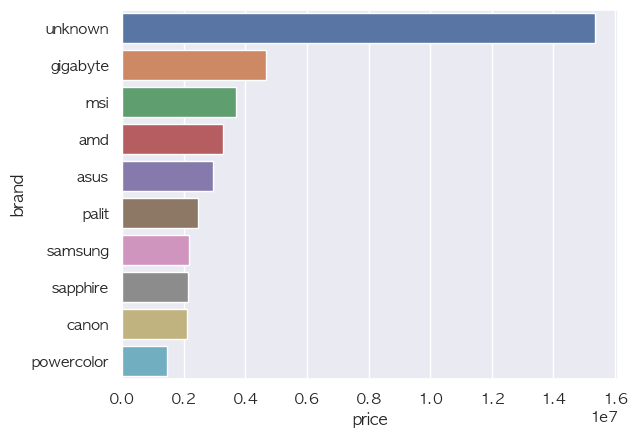

In [24]:
sns.barplot(x='price', y='brand', data=brand_df.head(10))

시간에 따른 분석
===

/var/folders/kw/s1p33ssd2q94nb1csdw73sdw0000gn/T/ipykernel_18007/58476263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['hour'] = filtered_df['event_time'].dt.hour


Text(0, 0.5, '이벤트 횟수')

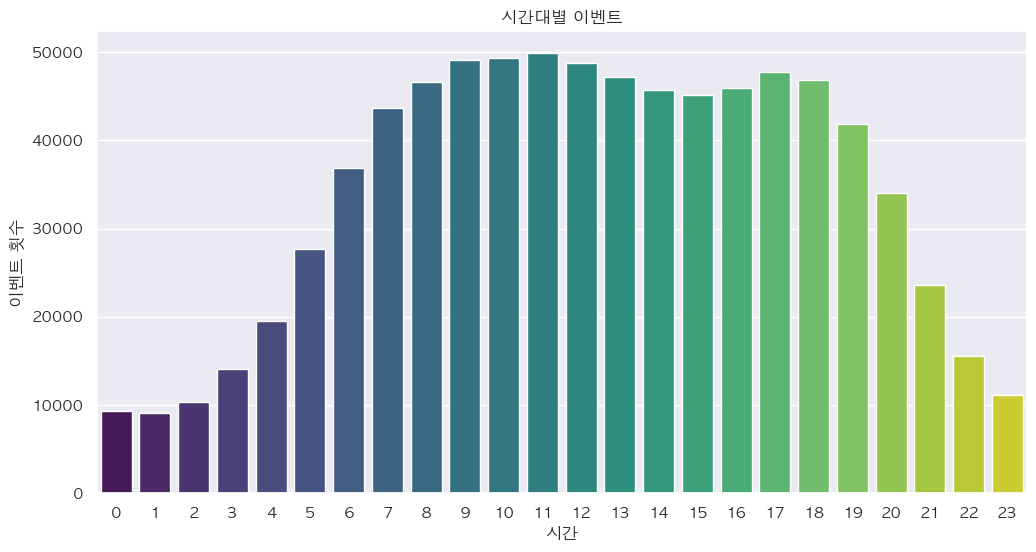

In [25]:
# 시간대 추출
filtered_df['hour'] = filtered_df['event_time'].dt.hour

plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=filtered_df, palette='viridis')
plt.title('시간대별 이벤트')
plt.xlabel('시간')
plt.ylabel('이벤트 횟수')

In [26]:
# 요일별
filtered_df['day_of_week'] = filtered_df['event_time'].dt.dayofweek

/var/folders/kw/s1p33ssd2q94nb1csdw73sdw0000gn/T/ipykernel_18007/2539601006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['day_of_week'] = filtered_df['event_time'].dt.dayofweek


In [27]:
day_map = {'0': 'Mon', '1': 'Tue', '2': 'Wed', '3': 'Thu', '4': 'Fri', '5': 'Sat', '6': 'Sun'}

filtered_df['day_of_week'] = filtered_df['day_of_week'].astype(str).replace(day_map)
filtered_df

/var/folders/kw/s1p33ssd2q94nb1csdw73sdw0000gn/T/ipykernel_18007/1657905343.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['day_of_week'] = filtered_df['day_of_week'].astype(str).replace(day_map)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,hour,day_of_week
0,2020-09-24 11:57:06,view,1996170,2144415922528452715,electronics.telephone,unknown,31.90,1515915625519388267,LJuJVLEjPT,11,Thu
1,2020-09-24 11:57:26,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,11,Thu
2,2020-09-24 11:57:27,view,215454,2144415927158964449,unknown,unknown,9.81,1515915625513238515,4TMArHtXQy,11,Thu
3,2020-09-24 11:57:33,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,11,Thu
4,2020-09-24 11:57:36,view,3658723,2144415921169498184,unknown,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,11,Thu
...,...,...,...,...,...,...,...,...,...,...,...
885124,2021-02-28 23:55:01,view,953226,2144415927553229037,unknown,unknown,219.94,1515915625611023730,FRLqIttxKU,23,Sun
885125,2021-02-28 23:58:05,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.03,1515915625611024014,g6WqPf50Ma,23,Sun
885126,2021-02-28 23:58:09,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.92,1515915625611024020,xNIJBqZdkd,23,Sun
885127,2021-02-28 23:58:14,view,888273,2144415921932861531,electronics.telephone,unknown,10.16,1515915625611024030,9pCbKMIcSx,23,Sun


<Axes: xlabel='day_of_week', ylabel='count'>

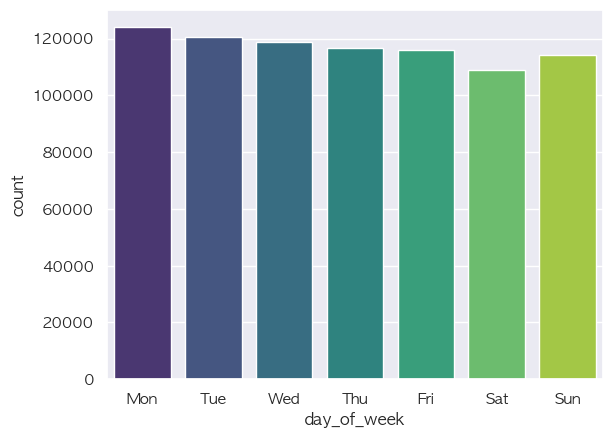

In [32]:
sns.countplot(data=filtered_df, x='day_of_week', palette='viridis', order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])